In [2]:
import zipfile
zip_ref = zipfile.ZipFile('archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
!pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 6.8 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 6.5 MB/s eta 0:00:00
     ------------------------------------- 186.9

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'archive/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


625/625 [==============================] - 870s 1s/step - loss: 1.4688 - accuracy: 0.5648 - val_loss: 0.6625 - val_accuracy: 0.5808
Epoch 2/10
625/625 [==============================] - 834s 1s/step - loss: 0.6389 - accuracy: 0.6526 - val_loss: 0.6850 - val_accuracy: 0.6136
Epoch 3/10
625/625 [==============================] - 797s 1s/step - loss: 0.5638 - accuracy: 0.7155 - val_loss: 0.6438 - val_accuracy: 0.6660
Epoch 4/10
625/625 [==============================] - 783s 1s/step - loss: 0.4933 - accuracy: 0.7582 - val_loss: 0.5201 - val_accuracy: 0.7380
Epoch 5/10
625/625 [==============================] - 758s 1s/step - loss: 0.4306 - accuracy: 0.7983 - val_loss: 0.5978 - val_accuracy: 0.7082
Epoch 6/10
625/625 [==============================] - 760s 1s/step - loss: 0.3885 - accuracy: 0.8213 - val_loss: 0.4390 - val_accuracy: 0.7966
Epoch 7/10
625/625 [==============================] - 758s 1s/step - loss: 0.3326 - accuracy: 0.8526 - val_loss: 0.5964 - val_accuracy: 0.73

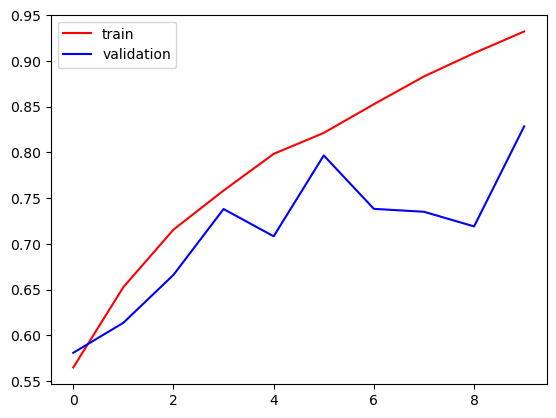

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

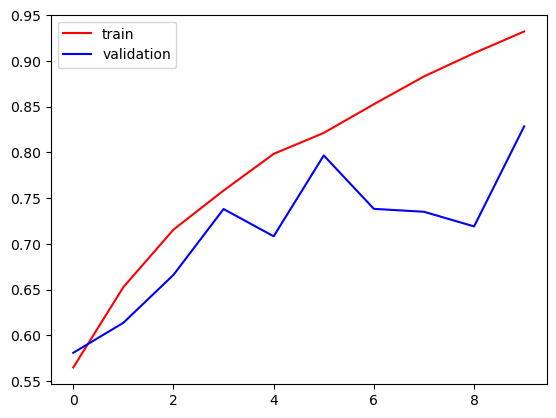

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

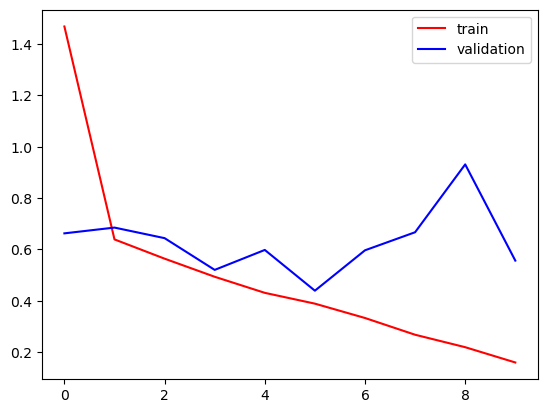

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

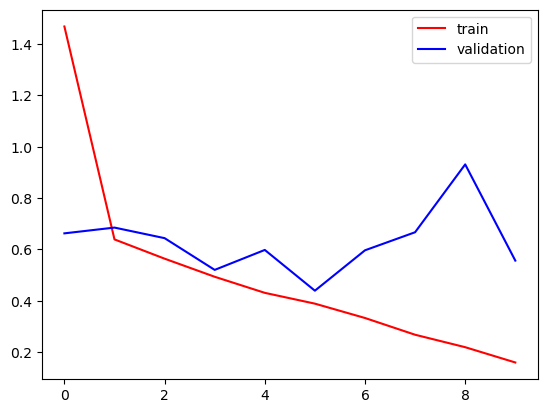

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [22]:
pip install opencv-python

     ---------------------------------------- 38.6/38.6 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2

In [33]:
test_img = cv2.imread('archive/dogs_vs_cats/test/dogs/dog.100.jpg')

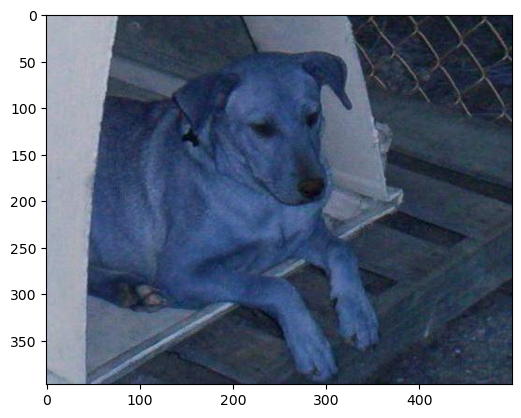

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(397, 500, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 [==============================] - 0s 37ms/step


array([[1.]], dtype=float32)